In [2]:
from sympy import *
from IPython.display import display
init_printing()

Zuerst mal alle Symbole definieren

In [3]:
t = Symbol("t")
xct = Function("x_c")(t)
yct = Function("y_c")(t)
zct = Function("z_c")(t)
xft = Function("x_f")(t)
yft = Function("y_f")(t)
zft = Function("z_f")(t)
xbt = Function("x_b")(t)
ybt = Function("y_b")(t)
zbt = Function("z_b")(t)

xcdt = xft.diff(t)
ycdt = yft.diff(t)
zcdt = zft.diff(t)
xfdt = xft.diff(t)
yfdt = yft.diff(t)
zfdt = zft.diff(t)
xbdt = xbt.diff(t)
ybdt = ybt.diff(t)
zbdt = zbt.diff(t)


xcs, ycs, zcs, xfs, yfs, zfs, xbs, ybs, zbs = symbols("x_c, y_c, z_c, x_f, y_f, z_f, x_b, y_b, z_b")
pc = Matrix([xct, yct, zct])
pf = Matrix([xft, yft, zft])
pb = Matrix([xbt, ybt, zbt])

xcds, ycds, zcds, xfds, yfds, zfds, xbds, ybds, zbds = symbols("\dot{x_c}, \dot{y_c}, \dot{z_c}, \dot{x_f}, \dot{y_f}, \dot{z_f}, \dot{x_b}, \dot{y_b}, \dot{z_b}")
pcdt = Matrix([xcdt, ycdt, zcdt])
pfdt = Matrix([xfdt, yfdt, zfdt])
pbdt = Matrix([xbdt, ybdt, zbdt])

es, ps, ls = symbols(r"\varepsilon, \varphi, \lambda")
et = Function(r"\varepsilon")(t)
pt = Function(r"\varphi")(t)
lt = Function(r"\lambda")(t) 

qs_to_qt_subs = [(ls, lt), (es, et), (ps, pt)]
qt_to_qs_subs = [(tup[1], tup[0]) for tup in qs_to_qt_subs]

eds, pds, lds = symbols(r"\dot{\varepsilon}, \dot{\varphi}, \dot{\lambda}")
edt = et.diff(t)
pdt = pt.diff(t)
ldt = lt.diff(t)

qds_to_qdt_subs = [(lds, ldt), (eds, edt), (pds, pdt)]
qdt_to_qds_subs = [(tup[1], tup[0]) for tup in qds_to_qdt_subs]

edds, pdds, ldds = symbols(r"\ddot{\varepsilon}, \ddot{\varphi}, \ddot{\lambda}")
eddt = et.diff(t, 2)
pddt = pt.diff(t, 2)
lddt = lt.diff(t, 2)

qdds_to_qddt_subs = [(ldds, lddt), (edds, eddt), (pdds, pddt)]
qddt_to_qdds_subs = [(tup[1], tup[0]) for tup in qdds_to_qddt_subs]

t_to_s_subs = qddt_to_qdds_subs + qdt_to_qds_subs + qt_to_qs_subs
s_to_t_subs = qdds_to_qddt_subs + qds_to_qdt_subs + qs_to_qt_subs

qt = Matrix([lt, et, pt])
qs = Matrix([ls, es, ps])

lc, lh, lp, dc, d1, d2 = symbols("l_c, l_h, l_p, d_c, d_1, d_2")
mc, mp = symbols("m_c, m_p")
Ffs, Fbs = symbols("F_f, F_b")

t = symbols("t")
g = symbols("g")

Aufstellen der Transformationsmatrizen

In [4]:
IA = Matrix([[cos(lt), -sin(lt), 0, 0],
             [sin(lt), cos(lt), 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])
AB = Matrix([[cos(et), 0, -sin(et), 0],
             [0, 1, 0, 0],
             [sin(et), 0, cos(et), 0],
             [0, 0, 0, 1]])
BC = Matrix([[1, 0, 0, lh],
             [0, cos(pt), sin(pt), 0],
             [0, -sin(pt), cos(pt), -d1],
             [0, 0, 0, 1]])
CMF = Matrix([[1, 0, 0, 0],
              [0, 1, 0, -lp],
              [0, 0, 1, d2],
              [0, 0, 0, 1]])
CMB = Matrix([[1, 0, 0, 0],
              [0, 1, 0, lp],
              [0, 0, 1, d2],
              [0, 0, 0, 1]])
BMC = Matrix([[1, 0, 0, -lc],
              [0, 1, 0, 0],
              [0, 0, 1, dc],
              [0, 0, 0, 1]])
IMC = IA*AB*BMC
IMF = IA*AB*BC*CMF
IMB = IA*AB*BC*CMB

Zum Beispiel Trafo von Frontrotorsystem zu Inertialsystem:

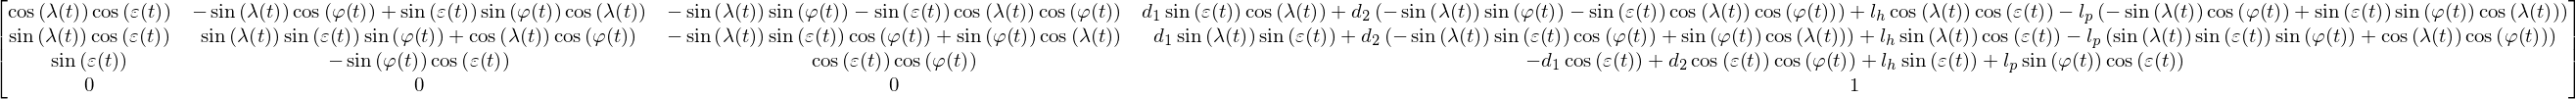

In [21]:
IMF

Definition der Transformationsgleichungen für Koordinaten und erste Zeitableitungen

In [22]:
pc_from_q = Matrix((IMC * Matrix([0, 0, 0, 1]))[0:3])
pf_from_q = Matrix((IMF * Matrix([0, 0, 0, 1]))[0:3])
pb_from_q = Matrix((IMB * Matrix([0, 0, 0, 1]))[0:3])

p_from_q = Matrix([pc_from_q[0], pc_from_q[1], pc_from_q[2], pf_from_q[0], pf_from_q[1], pf_from_q[2], pb_from_q[0], pb_from_q[1], pb_from_q[2]])

ps_to_qs_subs = list(zip([xcs, ycs, zcs, xfs, yfs, zfs, xbs, ybs, zbs], p_from_q.subs([(et, es), (pt, ps), (lt, ls)])))

pds_to_qds_subs = list(zip([xcds, ycds, zcds, xfds, yfds, zfds, xbds, ybds, zbds], Matrix([xcs, ycs, zcs, xfs, yfs, zfs, xbs, ybs, zbs]).subs(ps_to_qs_subs).jacobian(Matrix([ls, es, ps])) * Matrix([lds, eds, pds])))

Langrange-Funktion in redundanten Koordinaten

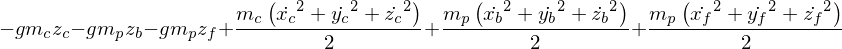

In [23]:
T = S(1)/S(2)*(mc*(xcds**2+ycds**2+zcds**2)+
               mp*(xfds**2+yfds**2+zfds**2)+
               mp*(xbds**2+ybds**2+zbds**2))
V = mc*g*zcs+mp*g*zfs+mp*g*zbs
L_redundant = T - V
L_redundant


Substitution und Darstellung in Minimalkoordinaten

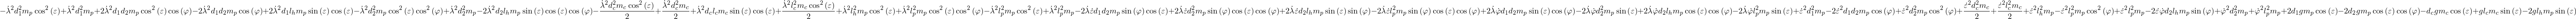

In [24]:
L = L_redundant.subs(ps_to_qs_subs).subs(pds_to_qds_subs).simplify()
L

Definition der Rotorkräfte

In [25]:
Ff_direction_local = Matrix([0, 0, 1, 0])
Ff = Ffs*(IMF * Ff_direction_local).row([0,1,2])

Fb_direction_local = Matrix([0, 0, 1, 0])
Fb = Fbs*(IMB * Fb_direction_local).row([0,1,2])

Rotorkräfte in redundanten Koordinaten

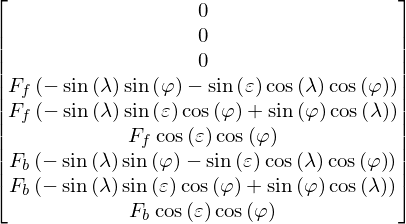

In [26]:
F_redundant = Matrix([0, 0, 0, Ff[0], Ff[1], Ff[2], Fb[0], Fb[1], Fb[2]]).subs(qt_to_qs_subs)
F_redundant

Rotorkräfte in Minimalkoordinaten

In [28]:
fl = (F_redundant.T * p_from_q.subs(qt_to_qs_subs).diff(ls))[0].simplify()
fe = (F_redundant.T * p_from_q.subs(qt_to_qs_subs).diff(es))[0].simplify()
fp = (F_redundant.T * p_from_q.subs(qt_to_qs_subs).diff(ps))[0].simplify()

display(fp)
display(fe)
display(fl.collect([d1, lh, lp]))

Aufstellen der Bewegungsgleichungen

In [29]:
L_d_l = L.diff(ls).simplify()
L_d_dl = L.diff(lds).simplify()

L_d_e = L.diff(es).simplify()
L_d_de = L.diff(eds).simplify()

L_d_p = L.diff(ps).simplify()
L_d_dp = L.diff(pds).simplify()

erster_term_l = L_d_dl.subs(s_to_t_subs).diff(t).subs(t_to_s_subs)
erster_term_e = L_d_de.subs(s_to_t_subs).diff(t).subs(t_to_s_subs)
erster_term_p = L_d_dp.subs(s_to_t_subs).diff(t).subs(t_to_s_subs)

Eq_l = Eq(erster_term_l - L_d_l, fl)
Eq_e = Eq(erster_term_e - L_d_e, fe)
Eq_p = Eq(erster_term_p - L_d_p, fp)

Bewegungsgleichung für $\lambda$

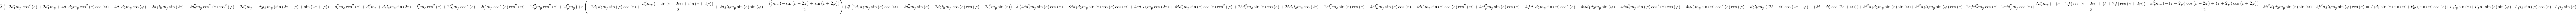

In [32]:
Eq_l = Eq(Eq_l.lhs.collect((ldds, lds, edds, pdds)), Eq_l.rhs)
Eq_l

Vernachlässigen von Zentripetalkräften

In [33]:
Eq_l_no_centripetal = Eq_l.subs([(lds, 0), (eds, 0), (pds, 0), (edds, 0), (pdds, 0)])
Eq_l_no_centripetal

Kleinwinkelnäherung $\cos^2 (e) \approx 1$, $\cos^2 (p) \approx 1$ und $\sin(e) \approx 0$

In [34]:
Eq_l_simplified = Eq_l_no_centripetal.subs([(cos(es)**2, 1), (cos(ps)**2, 1), (sin(es), 0)])
Eq_l_simplified = Eq(Eq_l_simplified.lhs, Eq_l_simplified.rhs.simplify())
Eq_l_simplified

Äquivalent für $e$

In [35]:
Eq_e_simplified = Eq(Eq_e.lhs.subs([(ldds, 0), (lds, 0), (pds, 0), (eds, 0)]).simplify().subs(sin(ps)**2, 0).collect((edds, g)), Eq_e.rhs)
Eq_e_simplified

Und für $p$

In [36]:
Eq_p_simplified = Eq(Eq_p.lhs.subs([(ldds, 0), (lds, 0), (eds, 0)]).expand().collect((pdds, g)), Eq_p.rhs)
Eq_p_simplified

In [41]:
Eq_e_single_axis = Eq_e.subs([(pdds, 0), (ldds, 0), (lds, 0), (pds, 0), (ps, 0)])
Eq(Eq_e_single_axis.lhs.collect([edds, cos(es), sin(es)]), Eq_e_single_axis.rhs)

In [48]:
Eq_p_single_axis = Eq_p.subs([(edds, 0), (eds, 0), (es, 0), (ldds, 0), (lds, 0)])
Eq(Eq_p_single_axis.lhs.expand().collect([pdds, d2*g*mp]), Eq_p_single_axis.rhs)